<a href="https://colab.research.google.com/github/RAPTORDAV/ALGORITMOS_OPT/blob/main/Proyecto_ejercicio_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmos de optimización - Seminario<br>

Nombre y Apellidos:   David Fernando Pozo Espín <br>

Vínculo colab: https://colab.research.google.com/drive/1UEtlkT_jqGWKHs8wbrS6DuZzxYKhqdBm?usp=sharing

Url github: https://github.com/RAPTORDAV/ALGORITMOS_OPT/blob/main/Proyecto_ejercicio_3.ipynb


## Problema:

## Combinar cifras y operaciones

Descripción del problema:

El problema consiste en analizar el siguiente problema y diseñar un algoritmo que lo resuelva:

- Disponemos de las 9 cifras del 1 al 9 (excluimos el cero) y de los 4 signos básicos de las operaciones fundamentales: suma(+), resta(-), multiplicación(*) y división(/)
- Debemos combinarlos alternativamente sin repetir ninguno de ellos para obtener una cantidad dada. Un ejemplo sería para obtener el 4:

4+2-6/3*1 = 4

Debe analizarse el problema para encontrar todos los valores enteros posibles planteando las siguientes cuestiones:
- ¿Qué valor máximo y mínimo se pueden obtener según las condiciones del problema?
- ¿Es posible encontrar todos los valores enteros posibles entre dicho mínimo y máximo ?
• Nota: Es posible usar la función de python “eval” para evaluar una expresión:

(*) La respuesta es obligatoria





                                        

## (*)¿Cuantas posibilidades hay sin tener en cuenta las restricciones?<br>

## ¿Cuantas posibilidades hay teniendo en cuenta todas las restricciones.




### Respuesta:
### Sin restricciones:
Se puede considerar un primer conjunto de números A={1,2,3,4,5,6,7,8,9}de 9 elmentos y un conjunto B={+,-,*,/} de cuatro elementos. 

En este caso no se considera la restrcción de repetición, es decir se podría usar más de una vez los operadores del conjunto B o los dígitos del conjunto A ejemplo: 1*1+1+1/2 y no necesarianete se usarán todos lo elementos del conjunto B.

Se puede iniciar con un análisis de variación con repetición con k= 5 en el conjunto A con n=9

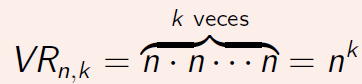

De esta fórmula se puede obtener un valor de VR=59049 combinaciones de 5 digitos.

Ahora se hará un análisis en el espacio del conjunto B, en donde se podrían repetir mas de una vez las operaciones matemáticas. Usando la misma fórmula anterior pero con K=4 y N=4 se tendría:
VRb=256
 De aquí el total de posibles combinaciones de dígitos y opernados para generar una expresión sería de:
 
#### T=VR*VRb=15116544


### Con restricciones:
Se puede considerar un primer conjunto de números A={1,2,3,4,5,6,7,8,9}de 9 elmentos y un conjunto B={+,-,*,/} de cuatro elementos. 

Para este análisis se considera que se usarán 5 elementos de A y todos los elementos de B pero sin que se repita ninguna de ellos mas de una vez en la operación matemática generada,

Cualquier combinación que utilice las 4 operaciones (todos los elementos del conjunto B) implicaría la utilización obligatoria de 5 elementos del conjunto A.
Se puede iniciar con un análisis de variación sin repetición con k= 5 en el conjunto A con n=9
 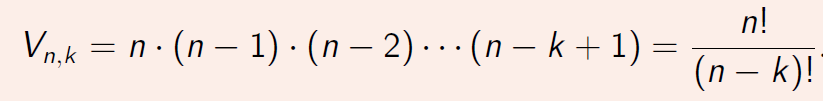


Él número total de variaciones de 5 elementos del conjunto A sería:
15120 combinaciones de 5 elementos del conjunto A. 

Sin embargo, si se considera que entre cada elemento hay una operación matemática, esta cantidad de V=15120 consideraría solo una distribución fija de las 4 operaciones. 

El siguiente paso será estimar cuantas permutaciones podemos tener con todos los elementos del conjunto B. Esto se puede calcular con la siguiente fórmula:
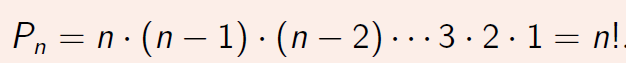

De esta fórmula el número de permutaciones totales P del conjunto B sería P=24.

Por tanto el número total de casos entre 5 dígitos sin repetir del conjunto A con las 4 operaciones del conjunto B serían: 

#### T=P*V=362880

Modelo para el espacio de soluciones<br>
(*) ¿Cual es la estructura de datos que mejor se adapta al problema? Argumentalo.(Es posible que hayas elegido una al principio y veas la necesidad de cambiar, argumentalo)


### Respuesta:

Una de las primeras formas de realizarlo sería mediante el uso de un algoritmo por fuerza bruta, que vaya buscando cada una de las combinaciones de A y B para obtener el número deseado de respuesta, pero implicaria hasta un máximo de 362880 opciones. Este procedimiento, si bien encontraría la expresión matemática que logre dar como resultado el valor deseado podría tartar mucho tiempo de ejecución.

Tomando en cuenta la cantidad de casos a analizar, un buen enfoque podría ser basado en métodos heurísticos, pero siempre teniendo en cuanta que no necesariamente se podrá alcanzar la respuesta óptima. 

Con esto en mente se ha optado por utilizar la técnica de 
Algoritmos genéticos para encontar expresiones que logren un resultado deseado. Mayores detalles de su implemtación se darán más adelante.

## Según el modelo para el espacio de soluciones<br>
## (*)¿Cual es la función objetivo?
## (*)¿Es un problema de maximización o minimización?

### Respuesta:

- La función objetivo en este caso sería simplemente un comparador de comprobación de si el resultado de la expresión matemática nos entrega el valor deseado o el más cercano al valor deseado (fijado previamente) en cada iteración del algoritmo genético.

- Ya que se trata de un problema de búsqueda de un valor resultante de entre todas las posibles soluciones, por tanto, no es un problema ni de maximización ni de minimización, ya que no se está maximizando ni minimizando ningún parámetro.

Diseña un algoritmo para resolver el problema por fuerza bruta

Respuesta

Calcula la complejidad del algoritmo por fuerza bruta

Respuesta

## (*)Diseña un algoritmo que mejore la complejidad del algortimo por fuerza bruta. Argumenta porque crees que mejora el algoritmo por fuerza bruta

### Respuesta
Se diseñará un algoritmo genético, cuya pobalción inicial se escogerá de manera aleatoria tomando en cuenta las restricciones del porblema:
- No repetir dígitos ni operaciones en la expresión matemática.
Esta caracterítica de aleatoridad en la población inicial, permitirá al algoritmo diversificar el espacio de búsqueda.
Para la creación de las siguientes generaciones se tomará en cuenta característica de Elitismo y operadores de cruce y mutación para los nuevos individuos.

La función de fitness considerará un rango alrededor del valor deseado que se quiere conseguir con la expresión matemática para escoger los mejores candidatos para su selección directa en la siguiente generación (elitismo). Al mismo tiempo si alguno de los individuos de la población permite obtener el valor deseado de manera exacta el algortimo lo entregará como mejor solución. 

El algortimo trabaja con población e iteraciones (generaciones) variables, modificables por el usuario. Si al cabo de las iteraciones establecidas no se ha encontrado una solución óptima, el algoritmo presentará todas las posibles expresiones que entregan el valor más cercano al deseado.

Este enfoque, se considera mejor que fuerza bruta , ya que no requiere buscar todas las combinaciones posibles para encontrar la solución de la expresión matemática, sino que mediante aleatoridad de la población y especificidad de los individuos orienta su búsqueda en las opciones con mayor viabilidad.

In [38]:
import numpy as np
import random 

In [42]:
#%%timeit -n3 -r2
%time
#******************************************************************************************
## creación de la población inicial randómica a manera de una lista de expresiones matemáticas tipo string
#*************************************************************************************************
def poblacion_inicial(pob):
    poblacion=[]
    for i in range (pob):
      sample=random.sample(A,5)     # se escogerá aleatoriamente los conjuntos de 5 digitos que formarán la expresión
                                    # matemática
      operand=random.sample(B,4)    # se escogeran de manera aleatoria los signos del conjunto de operadores
                                    # esta seleccion de aleatoriedad le dará diversificacion a la búsqueda
                                    # en cada re arranque
      poblacion.append(sample[0]+operand[0]+sample[1]+operand[1]+sample[2]+operand[2]+sample[3]+operand[3]+sample[4])
    return poblacion

## ************************************************************************************************
# se define una función de fitness, en este caso se establece un rangop de +- 0.5 del valor deseado
# que permitirá al algoritmo ir seleccionando los mejores individuos (expresiones) que se acerquen
# al valor deseado. En caso de que alguno de los individuos de como resultado el valor deseado de 
# manera exacta el algoritmo nos dará aviso para poder detener la iteraciones
#*************************************************************************************************
def fitness(expr,fix_val):
  calc=eval(expr)
  if (calc>=fix_val-0.5 and calc<=fix_val+0.5):
    #print("cercano: {0}".format(calc))
    if calc==fix_val:
      parar=True
      #print("igual")
    else:
      parar=False
    return expr,parar
  else:
    #print("lejano: {0}".format(calc))
    return None,False   #si no hay expresiones que cumplan con el criterio devolver None
       

##***************************************************************
# se encuentran los mejores individuos que cumplen con el fitness
#****************************************************************
def best_indiv(poblacion,fix_val):
  best=[]
  posicion=[]
  for i in range(len(poblacion)):
    expr,parar=fitness(poblacion[i],fix_val)
    if expr!=None:   # solo anexar expresiones cuando cumplan con criterio de fitness
      best.append(expr) 
      posicion.append(i)
    if parar:
      return best,posicion,parar
  return best,posicion,parar

##*****************************************************************
# Define las nuevas expresiones basadas en el cruce de los mejores individuos
# se utiliza técnica de cruce pork1 punto de tamaño aleatorio
##********************************************************************
def cruce(mejores):
  cruces=[]
  if len(mejores)>=2:
    for i in range(len(mejores)-1):
      half_left=random.randint(2,7)  #se escoge aleatoriamente la cantidad de genotipos que se intercambiarán del primer individuo
      new_expresion=mejores[i][0:half_left]+mejores[i+1][half_left::]
      cruces.append(new_expresion)
    return cruces
#******************************************************************************************
## Define nuevos individuos de manera randómica en reemplazo de los no aptos en la etapa anterior
#*************************************************************************************************
def mutacion(poblacion,posiciones,cruces):
  if cruces==None:
    cruces=[]
  val=len(poblacion)-len(posiciones)-len(cruces)
  pob=poblacion_inicial(val)
  return pob

#******************************************************************************************
## Define una nueva población a partir de elitismo, cruce y mutación
#*************************************************************************************************
def new_poblacion(mejores,cruces,mutaciones):
  if cruces!=None:
    new=mejores+cruces+mutaciones
  else:
    new=mejores+mutaciones
  return new

def calculo_expr(mejores):
  resultado=[]
  for i in mejores:
    resultado.append(eval(i))
  return resultado
# se fijan los elementos a usarse para la creación de las expresiones matemáticas
A=['1','2','3','4','5','6','7','8','9']
B=['+','-','*','/']
# se fija el valor a encontrar
fix_val=21
# Se fija el numero de iteraciones
iteraciones=10
# se fija la población inicial
poblacion=poblacion_inicial(100)  # creas la poblacion
cont=1

while (cont<=iteraciones):
  mejores,posiciones,parar=best_indiv(poblacion,fix_val) # se escogen los mejores individuos
  print("*"*60)
  print("{0} generación".format(cont))
  print("Mejores expresiones: ",mejores)
  print("valores calculados con las expresiones: ",calculo_expr(mejores))
  print("Posición del Individuo: ",posiciones)
  if parar:               # si ya se encuentra una expresión óptima se detiene el algoritmo
    print("Algoritmo optimo: ",mejores[-1])
    print("valor calculado: ",eval(mejores[-1]))
    print("iteración número: {0}".format(cont))
    break
  # si no se enceuntra una solución óptima se comienza a crear la siguiente generión  
  cruces=cruce(mejores)                         # se realiza un procesod e cruce con los mejores individuos
  print("Expresiones generadas por cruce: ",cruces)
  mutaciones=mutacion(poblacion,posiciones,cruces) #se realiza el proceso de mutación
  poblacion=new_poblacion(mejores,cruces,mutaciones) # se genera la siguiente población
  cont+=1
if not parar:
  print("no se encontró la solución exacta")
  print("Las mejores soluciones fueron: ",mejores)
  print("Valores calculados con las expresiones: ",calculo_expr(mejores))


CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 7.87 µs
************************************************************
1 generación
Mejores expresiones:  []
valores calculados con las expresiones:  []
Posición del Individuo:  []
Expresiones generadas por cruce:  None
************************************************************
2 generación
Mejores expresiones:  ['4-7/8+2*9']
valores calculados con las expresiones:  [21.125]
Posición del Individuo:  [99]
Expresiones generadas por cruce:  None
************************************************************
3 generación
Mejores expresiones:  ['4-7/8+2*9']
valores calculados con las expresiones:  [21.125]
Posición del Individuo:  [0]
Expresiones generadas por cruce:  None
************************************************************
4 generación
Mejores expresiones:  ['4-7/8+2*9']
valores calculados con las expresiones:  [21.125]
Posición del Individuo:  [0]
Expresiones generadas por cruce:  None
*****************************************

(*)Calcula la complejidad del algoritmo 

### Respuesta
Para el análisis de la complejidad, se realizará un analisis de las operaciones involucradas en el algoritmo tomando en cuenta cada una de las funciones.
El algortimo depende enteramente del tamaño de la población inicial que denotaremos por "n" y del numero de iteraciones o generaciones "Iter". Por ejemplo población de n=100 individuos y 10 Iteraciones

- La función def poblacion_inicial(pob): tiene operaciones de 2+3*n
- La función def fitness(expr,fix_val): tiene operaciones de 7
- La función def best_indiv(poblacion,fix_val): tiene operaciones 3+5*n+n*fitness
entonces sería: 3+5*n+7*n = 3+12*n

- La función def cruce(mejores):3+3*n
- La función def mutacion(poblacion,posiciones,cruces): 4+ poblacion inicial, --> 4+2+3*n=6+3*n
- La función def new_poblacion(mejores,cruces,mutaciones):5
- La función def calculo_expr(mejores): 2+n
- Programa principal iterativo While(): 
-->8+Iter*calculo_expr+Iter * best+Iter * cruce+iter * mutacion+iter * new_poblacion
-->9+Iter*(2+n)+Iter*(3+12*n)+Iter*(3+3*n)+Iter*(6+3*n)+Iter * 5

En general se tendría un algoritmo de complejidad:
### O(n*Iter)
Si se asume que el usuario coloca el número de iteraciones igual al número de individuos de la población se podría llegar al peor de los casos una complejidad:
### O(n^2)

En general la aproximación del algoritmo genénico puede dar un nivel de complejidad bastante aceptables dependiendo de la población y las iteraciones realizadas.


## Según el problema (y tenga sentido), diseña un juego de datos de entrada aleatorios

### Respuesta

In [45]:
# se va generar un conjunto de datos enteros entre -50 y 50, para los cuales el algoritmo
# generará las expresiones matemáticas que sean las más cercanas para el valor u las óptimas según sea el caso
datos_prueba=[i for i in range(-50,50)]
print(datos_prueba)

[-50, -49, -48, -47, -46, -45, -44, -43, -42, -41, -40, -39, -38, -37, -36, -35, -34, -33, -32, -31, -30, -29, -28, -27, -26, -25, -24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


### Aplica el algoritmo al juego de datos generado

## Respuesta

In [50]:
## se ha comentado varias lineas de visualización de consola para la ejecución sea más fácil de visualizar.
for i in datos_prueba: # se recorre el algoritmo para cada uno de los valores enteros generados anteriormente.
  print("*"*60)
  print("calculo de expresion para encontrar el valor de {}".format(i))
  print("*"*60)
  # se fija el valor a encontrar
  fix_val=i
  # Se fija el numero de iteraciones
  iteraciones=10
  # se fija la población inicial
  poblacion=poblacion_inicial(100)  # creas la poblacion
  cont=1
  while (cont<=iteraciones):
    mejores,posiciones,parar=best_indiv(poblacion,fix_val) # se escogen los mejores individuos
    #print("*"*60)
    #print("{0} generación".format(cont))
    #print("Mejores expresiones: ",mejores)
    #print("valores calculados con las expresiones: ",calculo_expr(mejores))
    #print("Posición del Individuo: ",posiciones)
    if parar:               # si ya se encuentra una expresión óptima se detiene el algoritmo
      print("Algoritmo optimo: ",mejores[-1])
      print("valor calculado: ",eval(mejores[-1]))
      print("iteración número: {0}".format(cont))
      break
    # si no se enceuntra una solución óptima se comienza a crear la siguiente generión  
    cruces=cruce(mejores)                         # se realiza un procesod e cruce con los mejores individuos
    #print("Expresiones generadas por cruce: ",cruces)
    mutaciones=mutacion(poblacion,posiciones,cruces) #se realiza el proceso de mutación
    poblacion=new_poblacion(mejores,cruces,mutaciones) # se genera la siguiente población
    cont+=1
  if not parar:
    print("No se encontró la solución exacta")
    print("Las mejores soluciones fueron: ",mejores)
    print("Valores calculados con las expresiones: ",calculo_expr(mejores))

************************************************************
calculo de expresion para encontrar el valor de -50
************************************************************
No se encontró la solución exacta
Las mejores soluciones fueron:  ['4+5/2-8*7']
Valores calculados con las expresiones:  [-49.5]
************************************************************
calculo de expresion para encontrar el valor de -49
************************************************************
No se encontró la solución exacta
Las mejores soluciones fueron:  []
Valores calculados con las expresiones:  []
************************************************************
calculo de expresion para encontrar el valor de -48
************************************************************
No se encontró la solución exacta
Las mejores soluciones fueron:  ['2/4+5-6*9']
Valores calculados con las expresiones:  [-48.5]
************************************************************
calculo de expresion para encontrar el valor d

## Enumera las referencias que has utilizado(si ha sido necesario) para llevar a cabo el trabajo

### Respuesta
Se ha utilizado la información del material de clase 
y del paper: 
https://ieeexplore.ieee.org/abstract/document/8580262

## Describe brevemente las lineas de como crees que es posible avanzar en el estudio del problema. Ten en cuenta incluso posibles variaciones del problema y/o variaciones al alza del tamaño

## Respuesta
En el presente problema, se podría mejorar las siguientes etapas:
- Cruce: por el momento el algoritmo fija aleatoriamiente un punto de cruce, podría implementarse un algoritmo de haga el proceso de cruce en n puntos.
- Mutación: el presente algoritmo mantiene en todas las generaciones el mismo tamaño de población que es igual a la suma de los mejores individuos de la generación anterior(elitista)+ individuos por cruce (en un punto aleatorio)+ individuos mutados (generados aleatoriamente). En este caso se podría colocar una heurística que permita mutar los elementos no seleccionados de la generación previa que no fueron escogidos. por el momento se los está eliminando y crenado nuevos de manera aleatoria.

- Función de Fitness: La función fitness es una función basada en límites fijos +- 0.5 del valor deseado, podría pensarse que estos valores podrían irse ajustando conforme las generaciones vayan mejorando en sus resultados (función dinámica).